In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [23]:
params_dict_mu = {
    'input_size': 3,
    'hidden_size': 10,
    'output_size': 3,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(3),
    "output_coords": np.arange(3),
    "signature_coords": np.arange(3)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models import get_ckpt_model, NJODE
model_mu = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(model_mu.parameters())
get_ckpt_model("../data/saved_models/id-57/best_checkpoint/", model_mu, optimizer, device)
model_mu.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=15, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=3, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [22]:
params_dict_vol = {
    'input_size': 9,
    'hidden_size': 10,
    'output_size': 9,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(9),
    "output_coords": np.arange(9),
    "signature_coords": np.arange(9)
}
model_vol = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(model_vol.parameters())
get_ckpt_model("../data/saved_models/id-54/last_checkpoint/", model_vol, optimizer_vol, device)
model_vol.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=21, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=9, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [4]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """
    delta_Wt = torch.randn_like(X_t) * delta_t** 0.5

    X_t_next = X_t + mu_t * delta_t + delta_Wt @ sigma_t

    return X_t_next

In [5]:
dataset_metadata = data_utils.load_metadata(stock_model_name="OrnsteinUhlenbeckMultiDimensional", time_id=46)
stockmodel = data_utils._STOCK_MODELS[dataset_metadata['model_name']](**dataset_metadata)

In [6]:
def next_cond_exp( y, delta_t, speed, mean):
    exp_delta = torch.matrix_exp(-speed * delta_t)
    return y @ exp_delta + mean @ (torch.eye(3) - exp_delta)

In [7]:
mu_data=np.load("../data/training_data/OrnsteinUhlenbeckMultiDimensional-46/data.npy")

In [19]:
speed = torch.tensor([[0.3, 0, 0], [0, 0.3, 0], [0, 0, 0.3]], dtype=torch.float)
mean = torch.tensor([[1.2, 1.0, 1.5]], dtype=torch.float)

In [21]:
def next_cond_exp( y, delta_t, speed, mean):
    exp_delta = torch.matrix_exp(-speed * delta_t)
    return y @ exp_delta + mean @ (torch.eye(3) - exp_delta)

In [24]:
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
Z = torch.tensor([], dtype=torch.float)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)


first_term = torch.tensor([], dtype=torch.float)
second_term = torch.tensor([], dtype=torch.float)
third_term = torch.tensor([], dtype=torch.float)


X_cond_true = torch.tensor([], dtype=torch.float)
X_cond_model = torch.tensor([], dtype=torch.float)
X_cond = torch.tensor([], dtype=torch.float)


for i in range(1, 101):
    T=delta_t*i
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_cond_model = torch.cat((X_cond_model, mu_pred))

    #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))

    if torch.isnan(mu_pred).any():
        break
        #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = start_X
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    else:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = X[i-3, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))

    """
    X_t = X[i-1,:].unsqueeze(0)
    if i>1:
        X_t_minus = X[i-2, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1))) 
    """

    #print(Z)
    X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))

    X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, speed, mean)))
    sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)




    first_term = torch.cat((first_term,X_t))
    second_term = torch.cat((second_term,mu_hat_t*delta_t))
    third_term = torch.cat((third_term,torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)))
    #X_next = X_t +  mu_hat_t*delta_t + torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)



    #X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
    #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))

    X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1

In [28]:
import os
save_path = "../data/figures"
if not os.path.exists(save_path):
    os.makedirs(save_path)

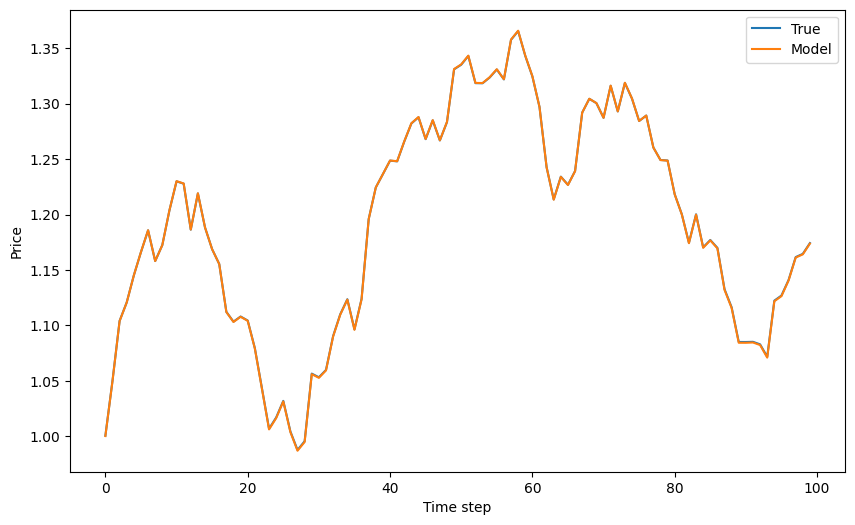

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(X_cond_true[:, 0].detach().numpy(), label='True')
ax.plot(X_cond_model[:, 0].detach().numpy(), label='Model')
ax.legend()
ax.set_ylabel('Price')
ax.set_xlabel('Time step')
fig.savefig(os.path.join(save_path, '3d_ou_1_ce.png'))
plt.show()

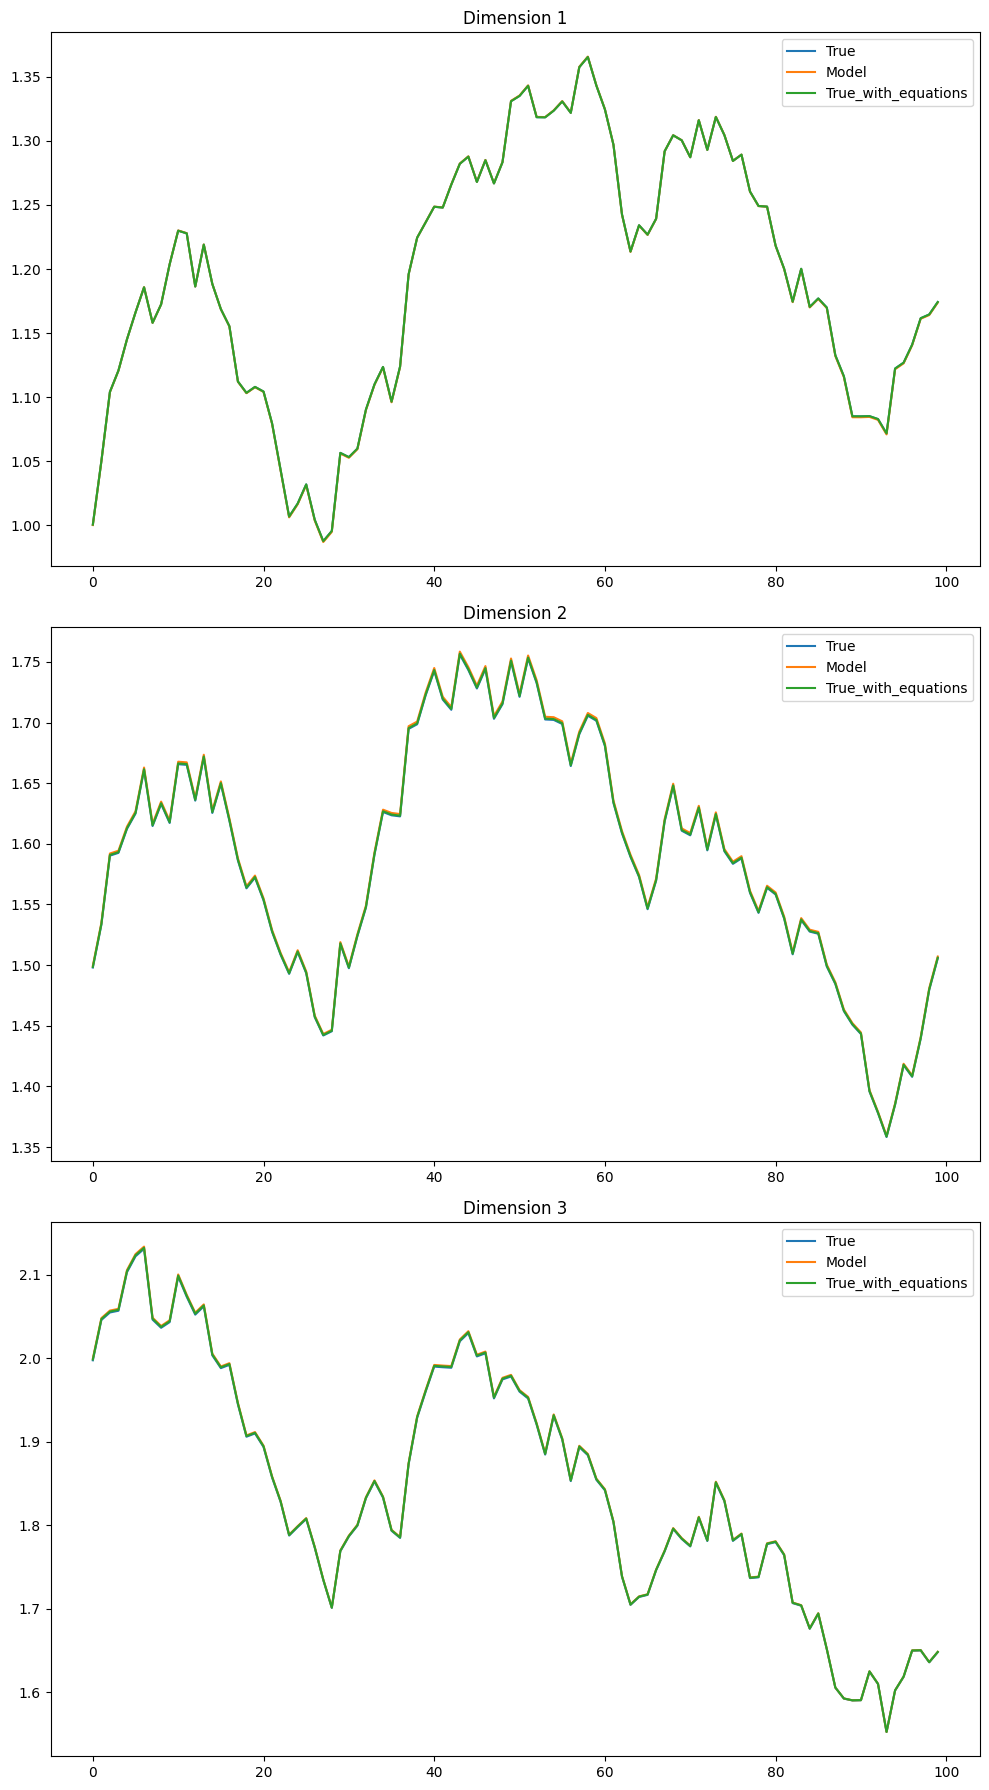

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(X_cond_true[:, i].detach().numpy(), label='True')
    axs[i].plot(X_cond_model[:,i].detach().numpy(), label='Model')
    axs[i].plot(X_cond[:,i].detach().numpy(), label='True_with_equations')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

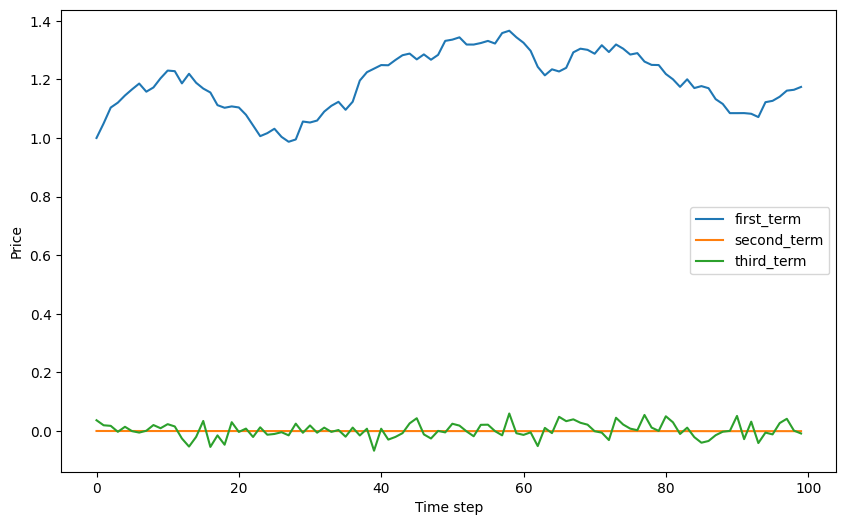

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(first_term[:, 0].detach().numpy(), label='first_term')
ax.plot(second_term[:,0].detach().numpy(), label='second_term')
ax.plot(third_term[:,0].detach().numpy(), label='third_term')
ax.legend()
ax.set_ylabel('Price')
ax.set_xlabel('Time step')
fig.savefig(os.path.join(save_path, '3d_ou_1_term.png'))
plt.show()

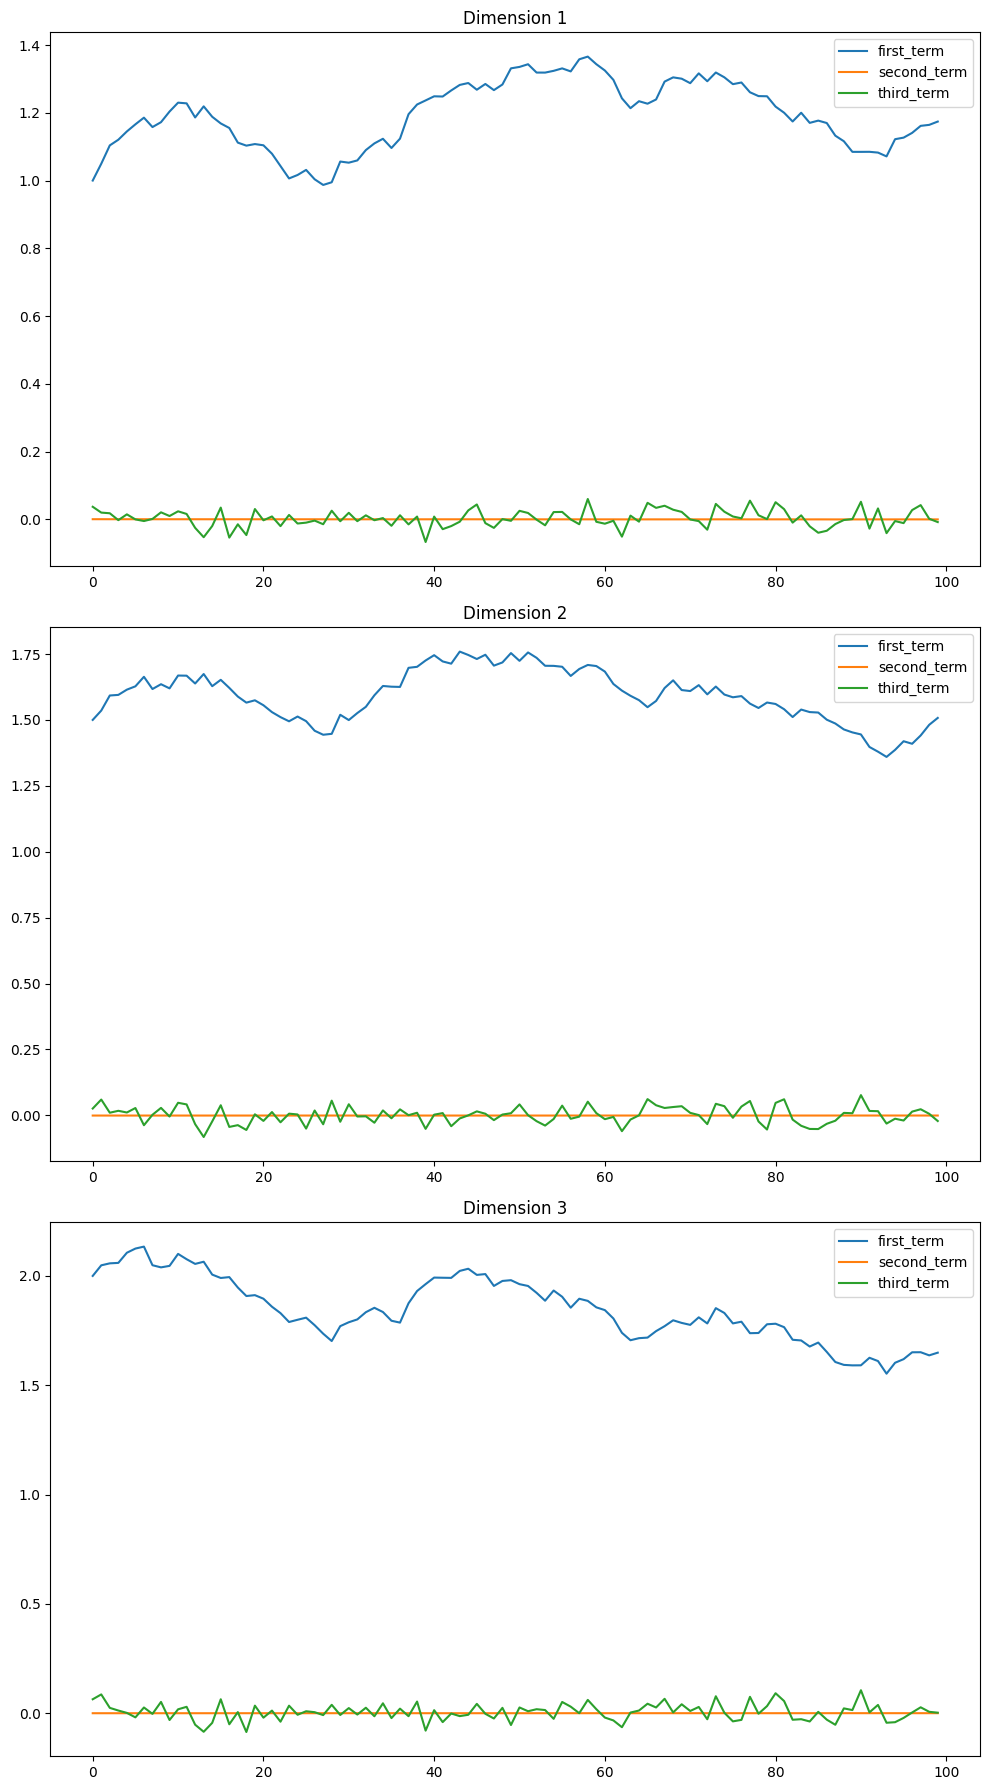

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(first_term[:, i].detach().numpy(), label='first_term')
    axs[i].plot(second_term[:,i].detach().numpy(), label='second_term')
    axs[i].plot(third_term[:,i].detach().numpy(), label='third_term')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()